In [1]:
import os 

from pathlib import Path 
os.chdir(Path('./..'))

In [2]:
from unsupervised_embeddings import MaskedLanguageModeling
from unsupervised_embeddings import SimCSE
from unsupervised_embeddings import utils

In [3]:
# import gzip 
# import csv

import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split

In [4]:
# train_dataset = []
# dev_dataset = []

# with open('notebooks/AllNLI.tsv', 'rt', encoding='utf8') as f_eval:
#     reader = csv.DictReader(f_eval, delimiter='\t', quoting=csv.QUOTE_NONE)
#     for row in reader:
#         if row['split'] == 'train':
#             train_dataset.append(row['sentence2'])
#         elif row['split'] == 'dev':
#             dev_dataset.append(row['sentence2'])
    

In [5]:
# # # def save_file(name, inputs):
# # #     with open('notebooks/'+name, 'wt', encoding='utf8') as f:
# # #         for sample in inputs:
# # #             f.write('{}\n'.format(sample))

# # # save_file('train_nli.csv', train_dataset)
# # # save_file('dev_nli.csv', dev_dataset)

# # # save_file('toy_train_nli.csv', train_dataset[:1000])
# # # save_file('toy_dev_nli.csv', dev_dataset[:100])

# import csv

# import shutil

# from sentence_transformers import util

# nli_dataset_path = 'datasets/AllNLI.tsv.gz'
# sts_dataset_path = 'datasets/stsbenchmark.tsv.gz'

# if not os.path.exists(nli_dataset_path):
#     util.http_get('https://sbert.net/datasets/AllNLI.tsv.gz', nli_dataset_path)

# if not os.path.exists(sts_dataset_path):
#     util.http_get('https://sbert.net/datasets/stsbenchmark.tsv.gz', sts_dataset_path)

# import gzip

# with gzip.open('datasets/AllNLI.tsv.gz', 'rb') as f_in:
#     with open('datasets/AllNLI.tsv', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

# with gzip.open('datasets/stsbenchmark.tsv.gz', 'rb') as f_in:
#     with open('datasets/stsbenchmark.tsv', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

# train_dataset = []
# dev_dataset = []

# with open('datasets/AllNLI.tsv', 'rt', encoding='utf8') as f_eval:
#     reader = csv.DictReader(f_eval, delimiter='\t', quoting=csv.QUOTE_NONE)
#     for row in reader:
#         if row['split'] == 'train':
#             train_dataset.append(row['sentence2'])
#         elif row['split'] == 'dev':
#             dev_dataset.append(row['sentence2'])

# def save_file(name, inputs):
#     with open('datasets/'+name, 'wt', encoding='utf8') as f:
#         for sample in inputs:
#             f.write('{}\n'.format(sample))

# save_file('train_nli.csv', train_dataset)
# save_file('dev_nli.csv', dev_dataset)

# save_file('toy_train_nli.csv', train_dataset[:1000])
# save_file('toy_dev_nli.csv', dev_dataset[:100])

In [6]:
# mlm_epochs = 3
# sim_cse_epochs = 7
# model_name = 'distilbert-base-uncased'

# mlm = MaskedLanguageModeling(model_name, output_path=f'output/mlm_{mlm_epochs}')
# mlm.set_datasets('notebooks/toy_train_nli.csv', 'notebooks/toy_dev_nli.csv') \
#     .train(epochs=mlm_epochs, batch_size=32, info_steps=100) \
#         .save()

# sim_cse = SimCSE(mlm.output_dir, output_path=f'output/mlm_{mlm_epochs}_sim_cse_{sim_cse_epochs}')
# sim_cse.set_datasets('notebooks/toy_train_nli.csv', 'notebooks/stsbenchmark.tsv') \
#     .train(epochs=sim_cse_epochs, batch_size=32, info_steps=100)


# model_dir = utils.consecutive_training( 
#     train_path='notebooks/toy_train_nli.csv', 
#     mlm_dev_path='notebooks/toy_dev_nli.csv',
#     sim_cse_dev_path='notebooks/stsbenchmark.tsv',
#     model_name='distilbert-base-uncased', 
#     mlm_epochs=3, 
#     sim_cse_epochs=7, 
#     batch_size=32, 
#     info_steps=100
# )

# utils.evaluate_embeddings(model_dir, 'notebooks/stsbenchmark.tsv')

# utils.perform_experiment( 
#     train_path='datasets/toy_train_nli.csv', 
#     mlm_dev_path='datasets/toy_dev_nli.csv',
#     sim_cse_dev_path='datasets/stsbenchmark.tsv',
#     test_path='datasets/stsbenchmark.tsv',
#     model_name='distilbert-base-uncased', 
#     max_epochs=3,
#     batch_size=64
# )

In [ ]:
utils.show_test_eval('./experiment_output/experiment_5_statistics.csv')

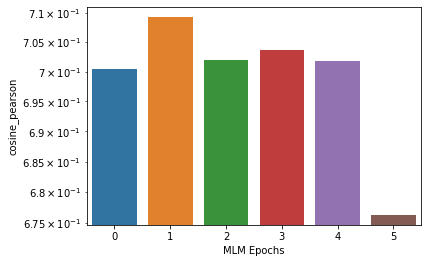

In [32]:
statistics = pd.read_csv('./experiment_output/experiment_5_statistics.csv')
statistics['Config'] = statistics['Config'].apply(lambda x: x.split('/')[1])

statistics['MLM Epochs'] = statistics['Config'].apply(lambda x: x.split('_')[1]).astype(int)
statistics['SimCSE Epochs'] = statistics['Config'].apply(lambda x: x.split('_')[-1]).astype(int)

ax = sns.barplot(x="MLM Epochs", y="cosine_pearson", data=statistics)
ax.set(yscale="log")

plt.show()

<Figure size 1296x1152 with 0 Axes>

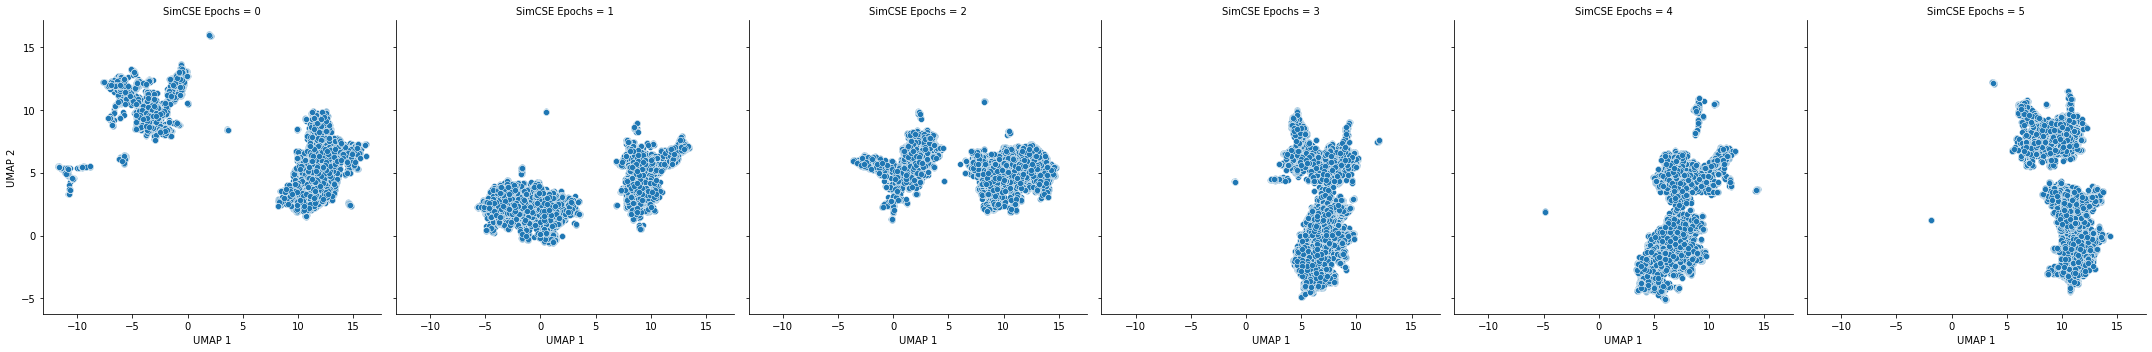

In [33]:
projections = pd.read_csv('./experiment_output/experiment_epochs_5_projections.csv')
projections['Name'] = projections['Name'].apply(lambda x: x.split('/')[1])
projections['MLM Epochs'] = projections['Name'].apply(lambda x: x.split('_')[1]).astype(int)
projections['SimCSE Epochs'] = projections['Name'].apply(lambda x: x.split('_')[-1]).astype(int)

plt.figure(figsize=(18, 16))

sns.relplot(data=projections, x='UMAP 1', y='UMAP 2', col='SimCSE Epochs', kind='scatter')
plt.show()